In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
hr = pd.read_csv(r"C:\Users\ANJOLA\Downloads\Salary_Data (1).csv")

In [20]:
hr.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [21]:
#data description
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [22]:
#remove duplicates
hr.drop_duplicates(inplace = True)

In [29]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1788 entries, 0 to 6631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1788 non-null   float64
 1   Gender               1788 non-null   object 
 2   Education Level      1787 non-null   object 
 3   Job Title            1788 non-null   object 
 4   Years of Experience  1788 non-null   float64
 5   Salary               1788 non-null   float64
dtypes: float64(3), object(3)
memory usage: 97.8+ KB


In [24]:
#dropping rows with no data on salary
hr.dropna(subset = ['Salary'],inplace = True )

In [25]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1788 entries, 0 to 6631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1788 non-null   float64
 1   Gender               1788 non-null   object 
 2   Education Level      1787 non-null   object 
 3   Job Title            1788 non-null   object 
 4   Years of Experience  1788 non-null   float64
 5   Salary               1788 non-null   float64
dtypes: float64(3), object(3)
memory usage: 97.8+ KB


In [13]:
#confirming categorical variables are in the right order
hr['Gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [28]:
hr['Education Level'].unique()

array(["Bachelor's Degree", "Master's Degree", 'PhD', nan, 'High School'],
      dtype=object)

In [9]:
hr.replace("Bachelor's Degree", "Bachelor's", inplace = True)
hr.replace("Master's Degree", "Master's", inplace = True)
hr.replace("phD", "PhD", inplace = True)

In [30]:
hr.isnull().sum()

Age                    0
Gender                 0
Education Level        1
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [33]:
# Converting numerical column to integers
pd.to_numeric(hr['Age'], errors='coerce')
pd.to_numeric(hr['Years of Experience'], errors='coerce')
pd.to_numeric(hr['Salary'], errors='coerce')



0        90000.0
1        65000.0
2       150000.0
3        60000.0
4       200000.0
          ...   
6623    150000.0
6624     40000.0
6625     80000.0
6628     90000.0
6631     70000.0
Name: Salary, Length: 1788, dtype: float64

In [47]:
#Is education a determinant of salary
hr.groupby('Education Level')['Salary'].mean()

Education Level
Bachelor's Degree     91145.566406
High School           45435.981818
Master's Degree      127432.806338
PhD                  160942.521994
Name: Salary, dtype: float64

### PhD holders have a higher pay. This is expected because they have a higher level of expertise ,and would most likely take on senior roles

<Axes: xlabel='Education Level', ylabel='Salary'>

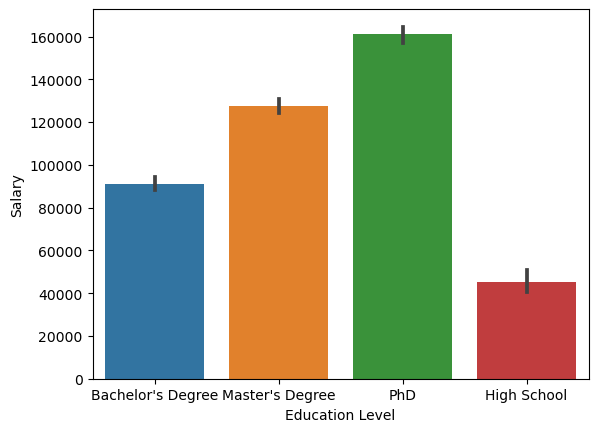

In [42]:
sns.barplot(x = 'Education Level', y = 'Salary', data = hr)

In [43]:
hr.describe()

,Age,Years of Experience,Salary
count,1788.000000,1788.000000,1788.000000
mean,35.135347,9.154922,113177.285794
std,8.213003,6.843199,51583.040514
min,21.000000,0.000000,350.000000
25%,29.000000,3.000000,70000.000000
50%,33.000000,8.000000,110000.000000
75%,41.000000,13.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [51]:
#Pearson correlation
hr['Age'].corr(hr['Salary'])

0.7667582622017589

### Since PhD holders are said to have a higher pay, I also want to confirm older people are the ones likely to fall in this category.



<Axes: xlabel='Salary', ylabel='Age'>

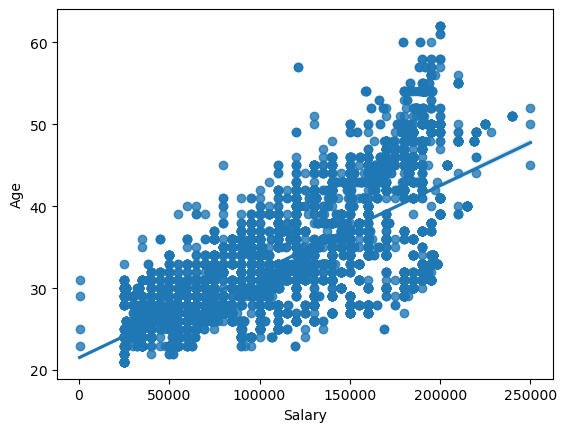

In [12]:
sns.regplot(x = 'Salary', y = 'Age', data = hr)

### Older people do earn more. This is most likely due to career progression over the years.
### I've also noticed people in their twenties ,and early thirties earn around 50,000 - 100,000. Although a few people in this age range are on the higher pay range.

<Axes: xlabel='Education Level', ylabel='Years of Experience'>

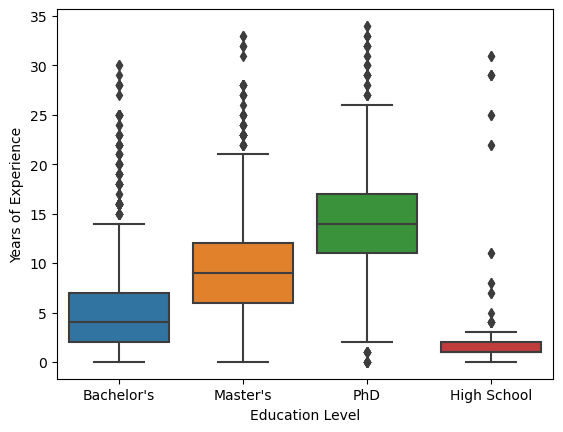

In [10]:
sns.boxplot(x = 'Education Level', y = 'Years of Experience', data = hr)


### A couple of high school leavers do have a high level of experience, but people with doctorate and masters degrees are more likely to have more years of experience. 

### There are some masters holders that don't have work experience though. Perhaps they started the program immediately after the bachelor's

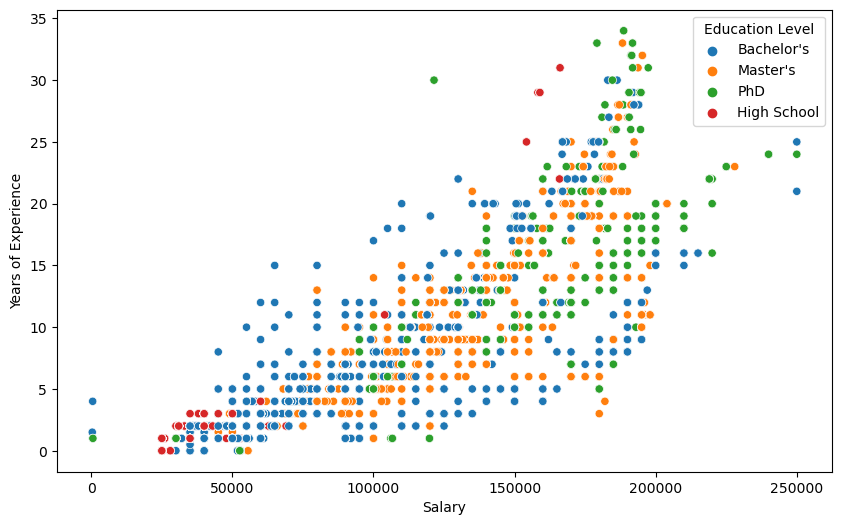

In [19]:
plt.figure(figsize=(10,6))
scatter = sns.scatterplot(x = 'Salary', y = 'Years of Experience', hue = 'Education Level', data = hr)
plt.legend(title = 'Education Level')
plt.show()

### a number of bachelor's degree ,and holders with less than 10 years of experience are within the same salary range of PhD holders. There's an even spread of Bachelor degree holders in different salary ranges.

### High school leavers are on the lower end of the spectrum, but a few have done well for themselves in earning at a level with degree holders.

### Overall, PhD holders are likely to have higher years of experience that comes with higher pay

In [28]:
hr.groupby('Gender').mean()

C:\Users\ANJOLA\AppData\Local\Temp\ipykernel_21200\3916104586.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hr.groupby('Gender').mean()


,Age,Years of Experience,Salary
Gender,,,
Female,32.624088,7.420179,107888.998672
Male,34.415895,8.616086,121389.870915
Other,39.571429,16.428571,125869.857143


### Women have a lower pay gap compared to men despite having nearly same years of experience

In [29]:
#I wanted to be sure this wasn't a bias till i realised there are more men than women recorded in this data.
#This could be for variety of reasons. Perhaps we have more men than women in the workforce

hr.groupby('Gender').count()

,Age,Education Level,Job Title,Years of Experience,Salary
Gender,,,,,
Female,3014,3014,3014,3013,3013
Male,3674,3673,3674,3674,3672
Other,14,14,14,14,14


In [43]:
women = hr[hr['Gender'] == 'Female']


In [44]:
education = women['Education Level'].value_counts()

<Axes: >

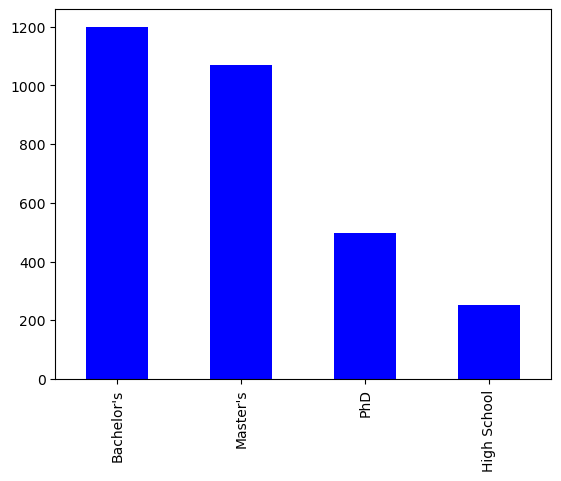

In [45]:
education.plot(kind = 'bar', color = 'blue')

In [46]:
'''Asides women being fewer in the workforce, most (in this dataset) pursue a bachelor's degree or a masters and continue in their careers ,
and fewer pursue a doctorate'''

"Asides women being fewer in the workforce, most (in this dataset) pursue a bachelor's degree or a masters and continue in their careers ,\nand fewer pursue a doctorate"